In [1]:
import OpenSimula as oms

time_step = 3600

project_dic = {
    "name": "Constructions test",
    "time_step": time_step,
    "components": [
        {
            "type": "Material",
            "name": "Light material",
            "conductivity": 0.03,
            "density": 43,
            "specific_heat": 1210,
        },
        {
            "type": "Material",
            "name": "Heavy material",
            "conductivity": 1.95,
            "density": 2240,
            "specific_heat": 900,
        },
         {
            "type": "Material",
            "name": "Gypsum board",
            "conductivity": 0.16,
            "density": 800,
            "specific_heat": 1090,
        },
        {
            "type": "Material",
            "name": "EPS board",
            "conductivity": 0.03,
            "density": 43,
            "specific_heat": 1210,
        },
        {
            "type": "Material",
            "name": "Heavyweight concrete",
            "conductivity": 1.95,
            "density": 2240,
            "specific_heat": 900,
        },
        {
            "type": "Material",
            "name": "Stucco",
            "conductivity": 0.72,
            "density": 1856,
            "specific_heat": 840,
        },
        {
            "type": "Construction",
            "name": "Light wall",
            "solar_alpha": [0.8, 0.8],
            "materials": ["Light material"],
            "thicknesses": [0.076],
        },
         {
            "type": "Construction",
            "name": "Heavy wall",
            "solar_alpha": [0.8, 0.8],
            "materials": ["Heavy material"],
            "thicknesses": [0.25],
        },
         {
            "type": "Construction",
            "name": "Multilayer wall",
            "solar_alpha": [0.8, 0.8],
            "materials": [
                "Gypsum board",
                "EPS board",
                "Heavyweight concrete",
                "EPS board",
                "Stucco",
            ],
            "thicknesses": [0.016, 0.076, 0.203, 0.076, 0.025],
        },
    ],
}


sim = oms.Simulation()
pro = oms.Project("Constructions test",sim)
pro.read_dict(project_dic)
pro.simulate()

ModuleNotFoundError: No module named 'OpenSimula'

In [2]:
pro.component_dataframe("Construction")

,name,type,description,solar_absortivity,lw_absortivity,materials,thicknesses
0,Light wall,Construction,Construction using layers of material,"[0.8, 0.8]","[0.9, 0.9]",[Light material],[0.076]
1,Heavy wall,Construction,Construction using layers of material,"[0.8, 0.8]","[0.9, 0.9]",[Heavy material],[0.25]
2,Multilayer wall,Construction,Construction using layers of material,"[0.8, 0.8]","[0.9, 0.9]","[Gypsum board, EPS board, Heavyweight concrete...","[0.016, 0.076, 0.203, 0.076, 0.025]"


In [3]:
print(pro.component("Multilayer wall").get_A())


(-11.376897358515194, -4.4015778089497894, 1.2692688566554959e-06)


In [4]:
Q_1, Q_2 =pro.component("Multilayer wall").get_T_step_fluxes()
print(pro.component("Multilayer wall").thermal_resistance())
print(sum(pro.component("Multilayer wall")._coef_T_a))
print(sum(pro.component("Multilayer wall")._coef_T_b))
print(sum(pro.component("Multilayer wall")._coef_T_c))
print(sum(pro.component("Multilayer wall")._coef_Q))

0.18848395268569496
0.0006275192683996932
0.0006275192684057712
0.0006275192683573387
0.0033292981151034507


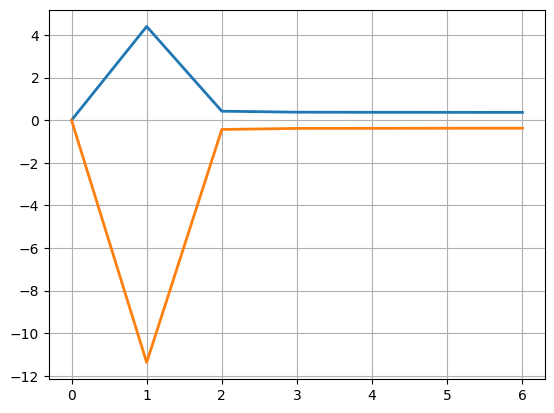

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
x = np.arange(7,step=time_step/3600)
x
ax.plot(x, Q_1[0:len(x)], linewidth=2.0)
ax.plot(x, Q_2[0:len(x)], linewidth=2.0)
plt.grid()
plt.show()